<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/PDSH-cover-small.png?raw=1">

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

<!--NAVIGATION-->
< [Text and Annotation](04.09-Text-and-Annotation.ipynb) | [Contents](Index.ipynb) | [Customizing Matplotlib: Configurations and Stylesheets](04.11-Settings-and-Stylesheets.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.10-Customizing-Ticks.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# 自訂刻度

## 主要和次要刻度

在每一個軸裡面，都有一個*主要*的刻度標記和*次要*的刻度標記

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np

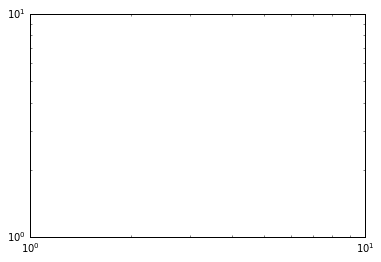

In [2]:
ax = plt.axes(xscale='log', yscale='log')
ax.grid();

可看到每一個主要刻度顯示一個大的刻度標記和一個標籤，而每一個次要的刻度顯示為沒有加上標籤且小一點的刻度。

透過設定每一個軸的``formatter``和``locator``物件來自訂這些刻度的特性，也就是位置與標籤。

In [3]:
print(ax.xaxis.get_major_locator())
print(ax.xaxis.get_minor_locator())

In [4]:
print(ax.xaxis.get_major_formatter())
print(ax.xaxis.get_minor_formatter())

從上圖，主要的和次要的刻度標籤都有各自用來指定位置的``LogLocator`` (讓對數圖表有意義)。但，次要刻度有它們自己使用``NullFormatter``格式化的標籤；這也是讓它不會顯示標籤的原因。

## 隱藏刻度或標籤

可以用``plt.NullLocator()``和``plt.NullFormatter()``來隱藏刻度或標籤

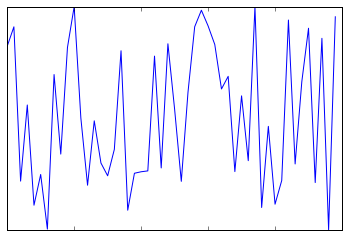

In [5]:
ax = plt.axes()
ax.plot(np.random.rand(50))

ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

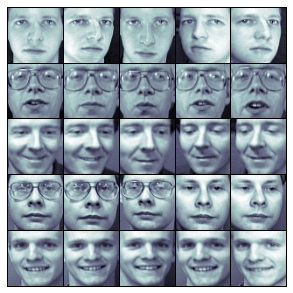

In [8]:
fig, ax = plt.subplots(5, 5, figsize=(5, 5))
fig.subplots_adjust(hspace=0, wspace=0)

# 從scikit-learn取得臉的資料
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images


for i in range(5):
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator()) # 移除x軸的標籤
        ax[i, j].yaxis.set_major_locator(plt.NullLocator()) # 移除y軸的標籤
        ax[i, j].imshow(faces[10 * i + j], cmap="bone")

每一個影像都有其自己的axes，而我們已經設定定位器為null，因為在此刻度值(在此例為像素數)並不能傳達此種特殊的視覺圖形的有意義資訊。

## 減少或增加刻度的數目

預設值的一個共同問題是，比較小的子圖表會被太過於擁擠的標籤所終結。

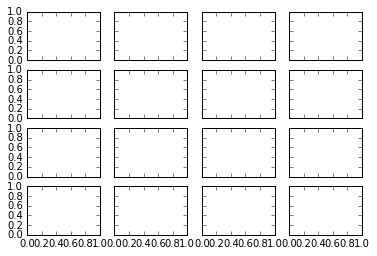

In [9]:
# 非常擁擠
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)

可用``plt.MaxNLocator()``修正數字都重疊在一起的狀況，它可以指定將要顯示的最大刻度值。給了這個最大值，Matplotlib將會使用內部的邏輯去選用特定的刻度位置:

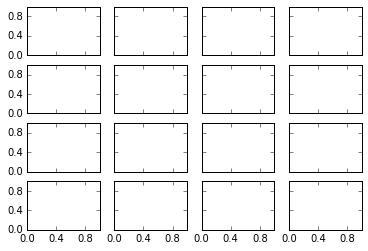

In [10]:
# 對每一個軸，設定x和y的主要刻度
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))
fig

如果想進一步控制刻度間隔位置的規則，可以使用``plt.MultipleLocator``

## 花式刻度格式

Matplotlib預設的刻度格式可以做很多想要做的，作為預設值可以運作得很好，但有時會想要多做一點:

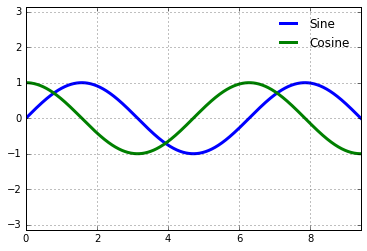

In [11]:
# 畫一個SIN和COS的圖形
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')
ax.plot(x, np.cos(x), lw=3, label='Cosine')

# 設定格線、圖例、和範圍
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi);

要做兩項調整:
首先, 資料的刻度和格線的間隔使用多個$\pi$看起來會比較自然，可藉由設定``MultipleLocator``完成，它會以我們提供的多個數字來定位刻度。
為了方便測量，將同時使用多個$\pi/4$來加上主要和次要刻度:

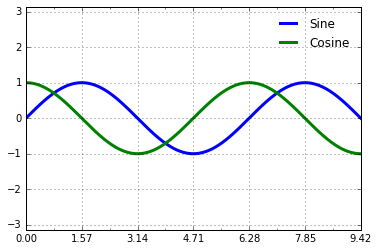

In [13]:
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2)) # 主要刻度
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4)) # 次要刻度
fig

但這些刻度看起來有點蠢: 我們知道代表好幾個$\pi$，但這些數字表示方法並沒辦法立即傳達出這個意思。為了修正這一點，可以更改刻度格式。沒有內建的格式器可以做到我們想要做的，所以要使用``plt.FuncFormatter``取代，它接受一個使用者自訂的函式可以對於刻度的輸出做更細微的調整:

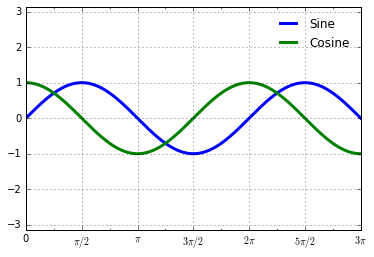

In [14]:
def format_func(value, tick_number):
    # 找出多個pi/2的數目
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig

``plt.FuncFormatter()``提供對於圖表刻度外觀非常精細的控制，當你在準備用來展示或發表的圖表時會非常實用。

## 格式器和定位器的摘要

以下列出的格式器和定位器均可在``plt``中被使用:

定位器類別        | 說明
---------------------|-------------
``NullLocator``      | 沒有刻度
``FixedLocator``     | 刻度位置是固定的
``IndexLocator``     | 索引圖表的定位器(例如:當x=range(len(y)))
``LinearLocator``    | 從min到max平均分配刻度間隔
``LogLocator``       | 從min到max做對數刻度
``MultipleLocator``  | 同時指定多個刻度和範圍
``MaxNLocator``      | 找出一個到最大數刻度的最佳位置
``AutoLocator``      | (預設值)使用簡單預設值的MaxNLocator
``AutoMinorLocator`` | 次要刻度的定位器

格式器類別       | 說明
----------------------|---------------
``NullFormatter``     | 在刻度上面不要設定標籤
``IndexFormatter``    | 用一個標籤串列來設定字串
``FixedFormatter``    | 手動字串設定標籤
``FuncFormatter``     | 使用者自訂函式設定標籤
``FormatStrFormatter``| 為每一個值使用一個格式字串
``ScalarFormatter``   | (預設值)使用純量做格式器
``LogFormatter``      | 對數軸的預設格式器


<!--NAVIGATION-->
< [Text and Annotation](04.09-Text-and-Annotation.ipynb) | [Contents](Index.ipynb) | [Customizing Matplotlib: Configurations and Stylesheets](04.11-Settings-and-Stylesheets.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.10-Customizing-Ticks.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
